In [4]:
import sys
import scipy.io
import scipy.signal as sig
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import os
import math
from DataHandlers.DiagEnum import DiagEnum
import DataHandlers.SAFERDataset as SAFERDataset
sys.modules['SAFERDataset'] = SAFERDataset

from Utilities.Plotting import *

### Load the SAFER dataset

In [5]:
feas2_pt_data, feas2_ecg_data = SAFERDataset.load_feas_dataset(2, "dataframe")

C:\Users\daniel\Documents\2022_23_DSiromani\Feas2\ECGs/filtered_dataframe.pk


In [ ]:
feas2_ecg_data["class_index"]

In [ ]:
# Fill in the undecided data with zenicor labels - doesnt seem to help
feas2_ecg_data["class_index"] = feas2_ecg_data["class_index"].where(feas2_ecg_data["measDiag"] != DiagEnum.Undecided, feas2_ecg_data["tag_orig_Poor_Quality"])

In [7]:
feas2_pt_data.index = feas2_pt_data["ptID"]

In [8]:
feas2_pt_data["noRecs"] = feas2_ecg_data["ptID"].value_counts()
feas2_pt_data["noHQrecs"] = feas2_ecg_data[feas2_ecg_data["class_index"] == 0]["ptID"].value_counts()

feas2_pt_data["noHQrecsNotUndecided"] = feas2_ecg_data[(feas2_ecg_data["class_index"] == 0) & (feas2_ecg_data["measDiag"] != DiagEnum.Undecided)]["ptID"].value_counts()

In [9]:
feas2_pt_data[["noRecs", "noHQrecs", "noHQrecsNotUndecided"]] = feas2_pt_data[["noRecs", "noHQrecs", "noHQrecsNotUndecided"]].fillna(0)

In [10]:
feas2_ecg_data["class_index"].value_counts()

0    22794
1      465
Name: class_index, dtype: int64

In [11]:
(feas2_pt_data["noRecs"] - feas2_pt_data["noHQrecs"]).sum()

0.0

In [ ]:
feas2_pt_data

In [ ]:
feas2_ecg_data[(feas2_ecg_data["ptID"] == 18) & (feas2_ecg_data["measDiag"] != DiagEnum.Undecided)]

In [ ]:
feas2_ecg_data["ptID"].value_counts().sort_index()

In [26]:
feas2_pt_data[feas2_pt_data["ptDiag"] == 1]

,ptID,age,ptDiag,ptDiagRev1,ptDiagRev2,ptDiagRev3,cardRev,noRecs,noHQrecs,noRecsPossAF,feas,noHQrecsNotUndecided
ptID,,,,,,,,,,,,
10015,10015,88.0,1,1,6,6,1,0.0,0.0,45,2,0.0
10069,10069,88.0,1,1,6,6,1,0.0,0.0,33,2,0.0
10086,10086,79.0,1,1,6,6,1,0.0,0.0,26,2,0.0
10126,10126,76.5,1,1,6,6,1,0.0,0.0,22,2,0.0
10138,10138,76.5,1,1,6,6,1,0.0,0.0,54,2,0.0
10168,10168,79.0,1,1,6,6,1,0.0,0.0,63,2,0.0
10183,10183,88.0,1,1,6,6,1,0.0,0.0,26,2,0.0
10194,10194,79.0,1,1,6,6,1,0.0,0.0,13,2,0.0
10246,10246,79.0,1,6,1,6,1,0.0,0.0,9,2,0.0


In [27]:
feas2_ecg_data[feas2_ecg_data["ptID"] == 281]

,ptID,age,ptDiag,ptDiagRev1,ptDiagRev2,ptDiagRev3,cardRev,measDiag,measDiagRev1,measDiagRev2,...,not_tagged_ign_wide_qrs,presNoAF,presAF,unlikelyAF,perhapsAF,measID,data,file_path,class_index,length
22645,281,88.0,DiagEnum.AF,DiagEnum.Undecided,DiagEnum.AF,DiagEnum.Undecided,1,DiagEnum.Undecided,DiagEnum.Undecided,DiagEnum.Undecided,...,1,0,0,1,0,22646,"[0.15193971477801835, 0.2678284498158197, 0.19...",ECGs/022000/saferF2_022646,0,9120
22646,281,88.0,DiagEnum.AF,DiagEnum.Undecided,DiagEnum.AF,DiagEnum.Undecided,1,DiagEnum.Undecided,DiagEnum.Undecided,DiagEnum.Undecided,...,1,0,0,1,0,22647,"[-0.04143179153836273, 0.09010720004358395, 0....",ECGs/022000/saferF2_022647,0,9120
22647,281,88.0,DiagEnum.AF,DiagEnum.Undecided,DiagEnum.AF,DiagEnum.Undecided,1,DiagEnum.Undecided,DiagEnum.Undecided,DiagEnum.Undecided,...,1,0,0,1,0,22648,"[-0.31751904300249456, -0.16372814794662166, -...",ECGs/022000/saferF2_022648,0,9120
22648,281,88.0,DiagEnum.AF,DiagEnum.Undecided,DiagEnum.AF,DiagEnum.Undecided,1,DiagEnum.Undecided,DiagEnum.Undecided,DiagEnum.Undecided,...,1,0,0,1,0,22649,"[-0.03650775326850162, -0.2761146297778209, -0...",ECGs/022000/saferF2_022649,0,9120
22649,281,88.0,DiagEnum.AF,DiagEnum.Undecided,DiagEnum.AF,DiagEnum.Undecided,1,DiagEnum.Undecided,DiagEnum.Undecided,DiagEnum.Undecided,...,0,0,0,0,1,22650,"[-0.3394053172986549, -0.2943796157359212, -0....",ECGs/022000/saferF2_022650,0,9120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22723,281,88.0,DiagEnum.AF,DiagEnum.Undecided,DiagEnum.AF,DiagEnum.Undecided,1,DiagEnum.Undecided,DiagEnum.Undecided,DiagEnum.Undecided,...,1,0,0,1,0,22724,"[-0.17406545017026773, -0.21013909178478887, -...",ECGs/022000/saferF2_022724,0,9120
22724,281,88.0,DiagEnum.AF,DiagEnum.Undecided,DiagEnum.AF,DiagEnum.Undecided,1,DiagEnum.Undecided,DiagEnum.Undecided,DiagEnum.Undecided,...,1,0,0,1,0,22725,"[-0.0751744558525675, -0.14540410027883824, -0...",ECGs/022000/saferF2_022725,0,9120
22725,281,88.0,DiagEnum.AF,DiagEnum.Undecided,DiagEnum.AF,DiagEnum.Undecided,1,DiagEnum.Undecided,DiagEnum.Undecided,DiagEnum.Undecided,...,1,0,0,1,0,22726,"[-0.13881632551453718, -0.3632034475436893, -0...",ECGs/022000/saferF2_022726,0,9120
22726,281,88.0,DiagEnum.AF,DiagEnum.Undecided,DiagEnum.AF,DiagEnum.Undecided,1,DiagEnum.Undecided,DiagEnum.Undecided,DiagEnum.Undecided,...,1,0,0,1,0,22727,"[0.01787991746253953, -0.12868237014990244, -0...",ECGs/022000/saferF2_022727,0,9120


In [22]:
feas2_ecg_data[(feas2_ecg_data["tag_orig_Poor_Quality"] == 0) & (feas2_ecg_data["measDiag"] == DiagEnum.AF)]["ptID"].unique()

array([ 15,  69,  86, 126, 138, 168, 183, 194, 246], dtype=int64)

In [32]:
import Models.NoiseCNN
import importlib
importlib.reload(Models.NoiseCNN)
from Models.NoiseCNN import CNN, hyperparameters

model = CNN(**hyperparameters)
pytorch_total_params = sum(p.numel() for p in model.parameters())
print(pytorch_total_params)

1117345


In [31]:
import Models.NoiseCNN
import importlib
importlib.reload(Models.NoiseCNN)
from Models.NoiseCNN import CNN, hyperparameters

model = CNN(**hyperparameters)
pytorch_total_params = sum(p.numel() for p in model.parameters())
print(pytorch_total_params)

839873


### Initialise the model

In [ ]:
import torch.nn as nn
import torch
from torch.optim.lr_scheduler import StepLR
from torchvision.ops import sigmoid_focal_loss

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [ ]:
# Check cuda
print(torch.cuda.is_available())

In [ ]:
# Now define a model
hyperparameters = {"lr": 0.00075, "k1": 17, "k2": 11, "k3": 5, "k4": 3, "k5": 3, "k6": 3,
                   "c1": 128, "c2": 256, "c3": 256, "c4": 128, "c5": 64, "c6": 32,
                   "lstm_n_hidden": 32, "dense1": 256, "dense2": 16, "gamma": 0.5, "sched_gamma": 0.5, "sched_step": 6}

class CNN(nn.Module):
    
    def __init__(self, k1, k2, k3, k4, k5, k6, c1, c2, c3, c4, c5, c6, lstm_n_hidden, dense2, **_):
        super(CNN, self).__init__()

        self.conv_section1 = nn.Sequential(
            nn.Conv1d(1, c1, k1, stride=4, padding=math.ceil((k1 - 4)/2)),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.BatchNorm1d(c1)
        )

        self.conv_section2 = nn.Sequential(
            nn.Conv1d(c1, c2, k2, stride=2, padding=math.ceil((k1 - 2)/2)),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.BatchNorm1d(c2)
        )

        self.conv_section3 = nn.Sequential(
            nn.Conv1d(c2, c3, k3, padding="same"),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.BatchNorm1d(c3)
        )

        self.conv_section4 = nn.Sequential(
            nn.Conv1d(c3, c4, k4, padding="same"),
            nn.ReLU(),
            nn.MaxPool1d(2, padding=1),
            nn.BatchNorm1d(c4)
        )

        self.conv_section5 = nn.Sequential(
            nn.Conv1d(c4, c5, k5, padding="same"),
            nn.ReLU(),
            nn.MaxPool1d(2, padding=1),
            nn.BatchNorm1d(c5)
        )

        self.conv_section6 = nn.Sequential(
            nn.Conv1d(c5, c6, k6, padding="same"),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.BatchNorm1d(c6)
        )

        self.lstm_n_hidden = lstm_n_hidden
        self.lstm = nn.LSTM(input_size=c6, hidden_size=lstm_n_hidden, bidirectional=True, batch_first=True)

        self.dense2 = nn.Linear(2*lstm_n_hidden, dense2)
        self.dense3 = nn.Linear(dense2, 1)

        self.activation = nn.ELU()
        self.logsoftmax = nn.LogSoftmax(dim=-1)

        self.dropout = nn.Dropout()

    def init_lstm_hidden(self, batch_size, device):
        # This resets the LSTM hidden state after each batch
        hidden_state = torch.zeros(2, batch_size, self.lstm_n_hidden, device=device)
        cell_state = torch.zeros(2, batch_size, self.lstm_n_hidden, device=device)
        return (hidden_state, cell_state)

    def forward(self, x):

        # [1, 9120]
        x = self.conv_section1(x)

        # [512, 1140]
        x = self.conv_section2(x)

        # [256, 570]
        x = self.conv_section3(x)

        # [128, 285]
        x = self.conv_section4(x)

        # [64, 143]
        x = self.conv_section5(x)

        # [32, 72]
        x = self.conv_section6(x)

        # [32, 36]
        x = torch.transpose(x, 1, 2)

        x, (h, _) = self.lstm(x, self.init_lstm_hidden(x.shape[0], x.device))
        x = torch.flatten(torch.transpose(h, 0, 1), 1, 2) # torch.flatten(x, 1, -1)
        # x = torch.flatten(x, 1, -1)

        # [1152]
        x = self.dense2(x)
        x = self.activation(x)
        x = self.dropout(x)

        # [128]
        x = self.dense3(x)
        # x = self.logsoftmax(x)

        # [1]
        return x

resnet_hyperparameters = {"k1": 17, "c1": 64, "c2": 128, "c3": 196, "c4": 256, "c5": 384, "c6": 512, "dense2": 64}

class ResNetCNN(nn.Module):

    def __init__(self, k1, c1, c2, c3, c4, c5, c6, dense2, **_):
        super(ResNetCNN, self).__init__()

        self.conv_section1 = nn.Sequential(
            nn.Conv1d(1, c1, k1, stride=4, padding=math.ceil((k1 - 4)/2)),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.BatchNorm1d(c1)
        )

        self.conv_section2 = nn.Sequential(
            nn.Conv1d(c1, c1, 3,padding="same"),
            nn.ReLU(),
            nn.BatchNorm1d(c1),
            nn.Conv1d(c1, c2, 3, padding="same"),
            nn.ReLU(),
            nn.BatchNorm1d(c2),
            nn.Conv1d(c2, c2, 3, padding="same"),
            nn.ReLU(),
            nn.BatchNorm1d(c2),
        )

        self.bypass_conv2 = nn.Conv1d(c1, c2, 1, padding="same")

        self.conv_section3 = nn.Sequential(
            nn.Conv1d(c2, c2, 3,padding="same"),
            nn.ReLU(),
            nn.BatchNorm1d(c2),
            nn.Conv1d(c2, c3, 3, padding="same"),
            nn.ReLU(),
            nn.BatchNorm1d(c3),
        )

        self.bypass_conv3 = nn.Conv1d(c2, c3, 1, padding="same")

        self.conv_section4 = nn.Sequential(
            nn.Conv1d(c3, c3, 3,padding="same"),
            nn.ReLU(),
            nn.BatchNorm1d(c3),
            nn.Conv1d(c3, c4, 3, padding="same"),
            nn.ReLU(),
            nn.BatchNorm1d(c4),
        )

        self.bypass_conv4 = nn.Conv1d(c3, c4, 1, padding="same")

        self.conv_section5 = nn.Sequential(
            nn.Conv1d(c4, c4, 3,padding="same"),
            nn.ReLU(),
            nn.BatchNorm1d(c4),
            nn.Conv1d(c4, c5, 3, padding="same"),
            nn.ReLU(),
            nn.BatchNorm1d(c5),
        )

        self.bypass_conv5 = nn.Conv1d(c4, c5, 1, padding="same")

        self.conv_section6 = nn.Sequential(
            nn.Conv1d(c5, c6, 3, padding="same"),
            nn.ReLU(),
            nn.BatchNorm1d(c6)
        )

        self.bypass_conv6 = nn.Conv1d(c5, c6, 1, padding="same")

        # self.lstm_n_hidden = lstm_n_hidden
        # self.lstm = nn.LSTM(input_size=c6, hidden_size=lstm_n_hidden, bidirectional=True, batch_first=True)

        self.dense2 = nn.Linear(c6, dense2)
        self.dense3 = nn.Linear(dense2, 1)

        self.activation = nn.ReLU()
        self.logsoftmax = nn.LogSoftmax(dim=-1)

        self.dropout = nn.Dropout()

    def init_lstm_hidden(self, batch_size, device):
        # This resets the LSTM hidden state after each batch
        hidden_state = torch.zeros(2, batch_size, self.lstm_n_hidden, device=device)
        cell_state = torch.zeros(2, batch_size, self.lstm_n_hidden, device=device)
        return (hidden_state, cell_state)

    def forward(self, x):

        # [1, 9120]
        x = self.conv_section1(x)
        # print(x.shape)

        # [512, 1140]
        x = self.conv_section2(x) + self.bypass_conv2(x)
        # print(x.shape)

        # [256, 570]
        x = self.conv_section3(x) + self.bypass_conv3(x)
        # print(x.shape)

        # [128, 285]
        x = self.conv_section4(x) + self.bypass_conv4(x)
        # print(x.shape)

        # [64, 143]
        x = self.conv_section5(x) + self.bypass_conv5(x)
        # print(x.shape)

        # [32, 72]
        x = self.conv_section6(x) + self.bypass_conv6(x)
        # print(x.shape)

        # [32, 36]
        x = torch.mean(x, dim=-1)
        # print(x.shape)

        # [1152]
        x = self.dense2(x)
        x = self.activation(x)
        x = self.dropout(x)

        # [128]
        x = self.dense3(x)
        # x = self.logsoftmax(x)

        # [1]
        return x

### Create Dataloaders

In [ ]:
# Onehot encoding
from torch.utils.data import Dataset, DataLoader

class Dataset(torch.utils.data.Dataset):
  'Characterizes a dataset for PyTorch'
  def __init__(self, dataset):
        'Initialization'
        self.dataset = dataset

  def __len__(self):
        'Denotes the total number of samples'
        return len(self.dataset.index)

  def __getitem__(self, index):
        'Generates one sample of data'
        # Select sample
        row = self.dataset.iloc[index]

        X = row["data"]
        y = row["class_index"]
        ind = row.name

        return X, y, ind

In [ ]:
# For SAFER data
# Split train and test data according to each patient
def make_SAFER_dataloaders(pt_data, ecg_data, test_frac, val_frac, only_clean_training=True):
    pt_data["noLQrecs"] = pt_data["noRecs"] - pt_data["noHQrecs"]  # for Feas1 this might include stuff flagged by zenicor as noisy?

    train_patients = []
    test_patients = []
    val_patients = []

    test_val_frac = test_frac + val_frac
    val_second_frac = val_frac/test_val_frac

    test_lq_count = 0
    test_total_count = 0

    val_lq_count = 0
    val_total_count = 0

    train_lq_count = 0
    train_total_count = 0

    test_val_ratio_overall = pt_data["noLQrecs"].sum() / (pt_data["noLQrecs"].sum() + pt_data["noHQrecsNotUndecided"].sum())
    train_ratio_overall = pt_data["noLQrecs"].sum() / pt_data["noRecs"].sum()

    for val, df in list(pt_data.groupby("noLQrecs"))[::-1]:
        print(f"processing {val}")
        print(f"number of patients {len(df.index)}")

        n_test = math.floor(len(df.index) * test_frac)
        n_val = math.floor(len(df.index) * val_frac)
        n_train = math.floor(len(df.index) * (1 - test_frac - val_frac))

        test_lq_count += n_test * val
        val_lq_count += n_val * val
        train_lq_count += n_train * val

        test_sample = df.sample(n_test)
        val_sample = df[~df["ptID"].isin(test_sample["ptID"])].sample(n_val)
        train_sample = df[(~df["ptID"].isin(test_sample["ptID"])) & (~df["ptID"].isin(val_sample["ptID"]))].sample(n_train)

        test_patients.append(test_sample)
        val_patients.append(val_sample)
        train_patients.append(train_sample)

        residual_samples = df[(~df["ptID"].isin(test_sample["ptID"])) & (~df["ptID"].isin(val_sample["ptID"])) & (~df["ptID"].isin(train_sample["ptID"]))]

        test_total_count += test_sample["noHQrecsNotUndecided"].sum() + test_sample["noLQrecs"].sum()
        val_total_count += val_sample["noHQrecsNotUndecided"].sum() + val_sample["noLQrecs"].sum()
        train_total_count += train_sample["noRecs"].sum()

        for _, pt in residual_samples.iterrows():
            pt_ratio_not_undecided = pt["noLQrecs"] / (pt["noHQrecsNotUndecided"] +  pt["noLQrecs"])

            test_ratio = test_lq_count/test_total_count
            val_ratio = val_lq_count/val_total_count

            if math.isnan(test_ratio):
                test_ratio = 0
            if math.isnan(val_ratio):
                val_ratio = 0

            print(pt_ratio_not_undecided)
            print(test_ratio)
            print(val_ratio)

            if pt_ratio_not_undecided > test_val_ratio_overall:
                # Choose smallest of test and val_dataset
                min_test_val = min(test_ratio, val_ratio)
                if min_test_val < test_val_ratio_overall:
                    # If test or val are lacking noisy samples
                    if min_test_val == test_ratio:
                        # Add to test
                        print("Adding to test 1")
                        test_patients[-1] = test_patients[-1].append(pt)
                        test_lq_count += pt["noLQrecs"]
                        test_total_count += pt["noHQrecsNotUndecided"] + pt["noLQrecs"]
                    else:
                        # Add to va
                        print("Adding to val 1")
                        val_patients[-1] = val_patients[-1].append(pt)
                        val_lq_count += pt["noLQrecs"]
                        val_total_count += pt["noHQrecsNotUndecided"] + pt["noLQrecs"]
                else:
                    # Add to train
                    print("Adding to train 1")
                    train_patients[-1] = train_patients[-1].append(pt)
                    train_lq_count += pt["noLQrecs"]
                    train_total_count += pt["noRecs"]
            else:
                # Choose the maximum of
                max_test_val = min(test_ratio, val_ratio)
                if max_test_val > test_val_ratio_overall:
                    # If test or val are lacking noisy samples
                    if max_test_val == test_ratio:
                        # Add to test
                        print("Adding to test 2")
                        test_patients[-1] = test_patients[-1].append(pt)
                        test_lq_count += pt["noLQrecs"]
                        test_total_count += pt["noHQrecsNotUndecided"] + pt["noLQrecs"]
                    else:
                        # Add to va
                        print("Adding to val 2")
                        val_patients[-1] = val_patients[-1].append(pt)
                        val_lq_count += pt["noLQrecs"]
                        val_total_count += pt["noHQrecsNotUndecided"] + pt["noLQrecs"]
                else:
                    # Add to train
                    print("Adding to train 2")
                    train_patients[-1] = train_patients[-1].append(pt)
                    train_lq_count += pt["noLQrecs"]
                    train_total_count += pt["noRecs"]


    train_pt_df = pd.concat(train_patients)
    test_pt_df = pd.concat(test_patients)
    val_pt_df = pd.concat(val_patients)

    print(f"Test high quality: {test_pt_df['noHQrecsNotUndecided'].sum()} low quality: {test_pt_df['noLQrecs'].sum()} ")
    print(f"Train high quality: {train_pt_df['noHQrecsNotUndecided'].sum()} low quality: {train_pt_df['noLQrecs'].sum()} ")
    print(f"Val high quality: {val_pt_df['noHQrecsNotUndecided'].sum()} low quality: {val_pt_df['noLQrecs'].sum()}")

    train_dataloader = None
    test_dataloader = None
    val_dataloader = None

    train_dataset = None
    test_dataset = None
    val_dataset = None

    if not train_pt_df.empty:
        # get ECG datasets
        #  & (ecg_data["measDiag"] != DiagEnum.Undecided)
        train_dataset = ecg_data[(ecg_data["ptID"].isin(train_pt_df["ptID"]))]
        # Normalise
        train_dataset["data"] = (train_dataset["data"] - train_dataset["data"].map(lambda x: x.mean()))/train_dataset["data"].map(lambda x: x.std())

        if only_clean_training:
            torch_dataset_train = Dataset(train_dataset[train_dataset["class_index"] == 0])
        else:
            torch_dataset_train = Dataset(train_dataset)

        train_dataloader = DataLoader(torch_dataset_train, batch_size=32, shuffle=True, pin_memory=True)

    if not test_pt_df.empty:
        test_dataset = ecg_data[(ecg_data["ptID"].isin(test_pt_df["ptID"])) & (ecg_data["measDiag"] != DiagEnum.Undecided)]
        test_dataset["data"] = (test_dataset["data"] - test_dataset["data"].map(lambda x: x.mean()))/test_dataset["data"].map(lambda x: x.std())
        torch_dataset_test = Dataset(test_dataset)
        test_dataloader = DataLoader(torch_dataset_test, batch_size=32, shuffle=True, pin_memory=True)

    if not val_pt_df.empty:
        val_dataset = ecg_data[(ecg_data["ptID"].isin(val_pt_df["ptID"])) & (ecg_data["measDiag"] != DiagEnum.Undecided)]
        val_dataset["data"] = (val_dataset["data"] - val_dataset["data"].map(lambda x: x.mean()))/val_dataset["data"].map(lambda x: x.std())
        torch_dataset_val = Dataset(val_dataset)
        val_dataloader = DataLoader(torch_dataset_val, batch_size=32, shuffle=True, pin_memory=True)

    return train_dataloader, test_dataloader, val_dataloader, train_dataset, test_dataset, val_dataset, test_pt_df, train_pt_df, val_pt_df

train_dataloader, test_dataloader, val_dataloader, train_dataset, test_dataset, val_dataset, test_pt_df, train_pt_df, val_pt_df = make_SAFER_dataloaders(feas2_pt_data, feas2_ecg_data, test_frac=0.15, val_frac=0.15, only_clean_training=False)

In [ ]:
# For SAFER data
# Split train and test data according to each patient
def make_SAFER_dataloaders(pt_data, ecg_data, test_frac, val_frac, only_clean_training=True):
    pt_data["noLQrecs"] = pt_data["noRecs"] - pt_data["noHQrecs"]  # for Feas1 this might include stuff flagged by zenicor as noisy?

    train_patients = []
    test_patients = []
    val_patients = []

    test_val_frac = test_frac + val_frac
    val_second_frac = val_frac/test_val_frac

    lq_counts = np.array([0, 0, 0], dtype=int)
    total_counts = np.array([0, 0, 0], dtype=int)

    fracs = np.array([1-test_frac - val_frac, test_frac, val_frac])



    total_lq_count = 0
    total_total_count = 0

    test_val_ratio_overall = pt_data["noLQrecs"].sum() / (pt_data["noLQrecs"].sum() + pt_data["noHQrecsNotUndecided"].sum())
    train_ratio_overall = pt_data["noLQrecs"].sum() / pt_data["noRecs"].sum()

    for val, pt in pt_data.iterrows():
        total_total_count += pt["noHQrecsNotUndecided"]
        total_lq_count += pt["noLQrecs"]

        exp_total_counts = total_total_count * fracs
        exp_lq_counts = total_lq_count * fracs

        loss_0 = np.sum(np.abs(lq_counts + np.array([pt["noLQrecs"], 0, 0]) - exp_lq_counts) + np.abs(total_counts + np.array([pt["noHQrecsNotUndecided"], 0, 0]) - exp_total_counts))
        loss_1 = np.sum(np.abs(lq_counts + np.array([0, pt["noLQrecs"], 0]) - exp_lq_counts) + np.abs(total_counts + np.array([0, pt["noHQrecsNotUndecided"], 0]) - exp_total_counts))
        loss_2 = np.sum(np.abs(lq_counts + np.array([0, 0, pt["noLQrecs"]]) - exp_lq_counts) + np.abs(total_counts + np.array([0, 0, pt["noHQrecsNotUndecided"]]) - exp_total_counts))

        min_loss = min([loss_0, loss_1, loss_2])

        if min_loss == loss_0:
            train_patients.append(pt)
            lq_counts += np.array([pt["noLQrecs"], 0, 0], dtype=int)
            total_counts += np.array([pt["noHQrecsNotUndecided"], 0, 0], dtype=int)
        elif min_loss == loss_1:
            test_patients.append(pt)
            lq_counts += np.array([0, pt["noLQrecs"], 0], dtype=int)
            total_counts += np.array([0, pt["noHQrecsNotUndecided"], 0], dtype=int)
        else:
            val_patients.append(pt)
            lq_counts += np.array([0, 0,  pt["noLQrecs"]], dtype=int)
            total_counts += np.array([0, 0, pt["noHQrecsNotUndecided"]], dtype=int)

    train_pt_df = pd.DataFrame(train_patients)
    test_pt_df = pd.DataFrame(test_patients)
    val_pt_df = pd.DataFrame(val_patients)

    print(f"Test high quality: {test_pt_df['noHQrecsNotUndecided'].sum()} low quality: {test_pt_df['noLQrecs'].sum()} ")
    print(f"Train high quality: {train_pt_df['noHQrecsNotUndecided'].sum()} low quality: {train_pt_df['noLQrecs'].sum()} ")
    print(f"Val high quality: {val_pt_df['noHQrecsNotUndecided'].sum()} low quality: {val_pt_df['noLQrecs'].sum()}")

    train_dataloader = None
    test_dataloader = None
    val_dataloader = None

    train_dataset = None
    test_dataset = None
    val_dataset = None

    if not train_pt_df.empty:
        # get ECG datasets
        #  & (ecg_data["measDiag"] != DiagEnum.Undecided)
        train_dataset = ecg_data[(ecg_data["ptID"].isin(train_pt_df["ptID"]))]
        # Normalise
        # train_dataset["data"] = (train_dataset["data"] - train_dataset["data"].map(lambda x: x.mean()))/train_dataset["data"].map(lambda x: x.std())

        if only_clean_training:
            torch_dataset_train = Dataset(train_dataset[train_dataset["class_index"] == 0])
        else:
            torch_dataset_train = Dataset(train_dataset)

        train_dataloader = DataLoader(torch_dataset_train, batch_size=32, shuffle=True, pin_memory=True)

    if not test_pt_df.empty:
        test_dataset = ecg_data[(ecg_data["ptID"].isin(test_pt_df["ptID"])) & (ecg_data["measDiag"] != DiagEnum.Undecided)]
        # test_dataset["data"] = (test_dataset["data"] - test_dataset["data"].map(lambda x: x.mean()))/test_dataset["data"].map(lambda x: x.std())
        torch_dataset_test = Dataset(test_dataset)
        test_dataloader = DataLoader(torch_dataset_test, batch_size=32, shuffle=True, pin_memory=True)

    if not val_pt_df.empty:
        val_dataset = ecg_data[(ecg_data["ptID"].isin(val_pt_df["ptID"])) & (ecg_data["measDiag"] != DiagEnum.Undecided)]
        # val_dataset["data"] = (val_dataset["data"] - val_dataset["data"].map(lambda x: x.mean()))/val_dataset["data"].map(lambda x: x.std())
        torch_dataset_val = Dataset(val_dataset)
        val_dataloader = DataLoader(torch_dataset_val, batch_size=32, shuffle=True, pin_memory=True)

    return train_dataloader, test_dataloader, val_dataloader, train_dataset, test_dataset, val_dataset, test_pt_df, train_pt_df, val_pt_df

train_dataloader, test_dataloader, val_dataloader, train_dataset, test_dataset, val_dataset, test_pt_df, train_pt_df, val_pt_df = make_SAFER_dataloaders(feas2_pt_data, feas2_ecg_data, test_frac=0.15, val_frac=0.15, only_clean_training=False)

In [ ]:
train_dataset = train_dataset[train_dataset["measDiag"] != DiagEnum.Undecided]

# Label smoothing on the samples we don't know:
# train_dataset.loc[(train_dataset["measDiag"] == DiagEnum.Undecided) & (train_dataset["class_index"] == 0), "class_index"] = 0.3

torch_dataset_train = Dataset(train_dataset)
train_dataloader = DataLoader(torch_dataset_train, batch_size=32, shuffle=True, pin_memory=True)

In [ ]:
val_dataset["tag_orig_Poor_Quality"].value_counts()

In [ ]:
train_pt_df["noHQrecs"].sum()

In [ ]:
print(train_dataset["class_index"].value_counts())
print(test_dataset["class_index"].value_counts())
print(val_dataset["class_index"].value_counts())

In [ ]:
good_test_dataset = test_dataset
good_val_dataset = val_dataset
good_train_dataset = train_dataset

In [ ]:
feas2_pt_data["noHQrecsNotUndecided"].sum()

In [ ]:
 feas2_pt_data["noLQrecs"].sum()

In [ ]:
### Use only the labelled portions of feas2 data for training and testing

feas2_ecg_data_no_undecided = feas2_ecg_data[feas2_ecg_data["measDiag"] != DiagEnum.Undecided]

feas2_pt_data_no_undecided = feas2_pt_data.copy()
feas2_pt_data_no_undecided["noRecs"] = feas2_ecg_data_no_undecided["ptID"].value_counts()
feas2_pt_data_no_undecided["noHQRecs"] = feas2_ecg_data_no_undecided[feas2_ecg_data_no_undecided["measDiag"] != DiagEnum.PoorQuality]["ptID"].value_counts()

train_dataloader, test_dataloader, train_dataset, test_dataset = make_SAFER_dataloaders(feas2_pt_data_no_undecided, feas2_ecg_data_no_undecided, test_frac=0.2, only_clean_training=False)

In [ ]:
feas2_ecg_data_unbalanced = feas2_ecg_data_unbalanced.drop(train_ecgs.index)
feas2_ecg_data_unbalanced["class_index"] = feas2_ecg_data_unbalanced["measDiag"].map(lambda x: int(x == DiagEnum.PoorQuality))

torch_dataset_test_unbalanced = Dataset(feas2_ecg_data_unbalanced)
test_unbalanced_dataloader = DataLoader(torch_dataset_test_unbalanced, batch_size=32, shuffle=True, pin_memory=True)

### Prepare for training

In [ ]:
if torch.cuda.is_available():
    print("Using Cuda")
    device = torch.device("cuda")
else:
    print("Using CPU")
    device = torch.device("cpu")

In [ ]:
num_epochs = 200
model = CNN(**hyperparameters).to(device)

# Use weightings to handle class imbalance

"""
class_counts = torch.tensor(train_dataset["class_index"].value_counts().values.astype(np.float32))
a = class_counts[0]/(class_counts[0] + class_counts[1])
"""

# If using label smoothing its a bit fiddly:
a = (len(train_dataset.index) - train_dataset["class_index"].round().sum())/len(train_dataset.index)

a_test_counts = torch.tensor(feas2_ecg_data[feas2_ecg_data["measDiag"] != DiagEnum.Undecided]["class_index"].value_counts().values.astype(np.float32))
a_test = a_test_counts[0]/(a_test_counts[0] + a_test_counts[1])

print(a, a_test)

class binary_focal_loss(nn.Module):

    def __init__(self, _alpha, _gamma):
        super(binary_focal_loss, self).__init__()
        self.BCE_loss = torch.nn.BCEWithLogitsLoss(reduction="none")
        self.alpha = _alpha
        self.gamma = _gamma

    def forward(self, pred, targets):
        bce = self.BCE_loss(pred, targets)
        prob_correct = torch.exp(-bce)
        loss_unweighted = (1.0 - prob_correct)**self.gamma * bce
        loss_weighted = torch.where(targets == 1,
                           loss_unweighted * self.alpha,
                           loss_unweighted * (1-self.alpha))
        return torch.mean(loss_weighted)

weight_modifier = 1
loss_func = binary_focal_loss((1 - (1-a) * weight_modifier), 0)
test_loss_func = binary_focal_loss(a_test, 0)

# Hyperparameter optimisation for new model
"""
lr: 0.00862260094056823
gamma: 0.06229441216331977
sched_gamma: 1.0
sched_step: 16
"""

optimizer = torch.optim.Adam(model.parameters(), lr=0.00002)
scheduler = StepLR(optimizer, 50, 1)

In [ ]:
import copy
model = model.to(device)

def train(model, train_dataloader, test_dataloader, loss_func, test_loss_func, optimizer, scheduler):
    best_test_loss = 100
    best_epoch = -1
    best_model = copy.deepcopy(model).cpu()

    losses = []

    for epoch in range(num_epochs):
        total_loss = 0
        print(f"starting epoch {epoch} ...")
        # Train
        num_batches = 0
        model.train()
        for i, (signals, labels, _) in enumerate(train_dataloader):
            signals = torch.unsqueeze(signals.to(device), 1).float()

            labels = labels.float()

            optimizer.zero_grad()
            output = model(signals).to("cpu")[:, 0]
            loss = loss_func(output, labels)
            loss.backward()
            optimizer.step()

            # Add the number of signals in this batch to a counter
            num_batches += signals.shape[0]
            total_loss += float(loss)

        print(f"Epoch {epoch} finished with average loss {total_loss/num_batches}")
        print("Testing ...")
        # Test
        num_test_batches = 0
        test_loss = 0
        with torch.no_grad():
            model.eval()
            for i, (signals, labels, _) in enumerate(test_dataloader):
                signals = torch.unsqueeze(signals.to(device), 1).float()
                # fft = torch.abs(torch.fft.fft(signals))
                # signals = torch.cat([signals, fft], dim=1)
                labels = labels.float()
                output = model(signals).to("cpu")[:, 0]
                loss = test_loss_func(output, labels)
                test_loss += float(loss)
                num_test_batches += signals.shape[0]

        print(f"Average test loss: {test_loss/num_test_batches}")
        losses.append([total_loss/num_batches, test_loss/num_test_batches])

        if test_loss/num_test_batches < best_test_loss:
            best_model = copy.deepcopy(model).cpu()
            best_test_loss = test_loss/num_test_batches
            best_epoch = epoch
        else:
            if best_epoch + 20 <= epoch:
                return best_model, losses
        scheduler.step()

    return best_model, losses

model, losses = train(model, train_dataloader, test_dataloader, loss_func, loss_func, optimizer, scheduler)
model = model.to(device)

In [ ]:
last_losses = losses

In [ ]:
losses = last_losses + losses

In [ ]:
# Plot the training curve (2 seperate axes)
fig, ax = plt.subplots(figsize=(6, 4))
ax2 = ax.twinx()

train_l = ax.plot([l[0] for l in losses], label="training loss")
val_l = ax2.plot([l[1] for l in losses], label="validation loss", color="#ff7f0e")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel("Epoch number")
ax.set_ylabel("Training loss")
ax2.set_ylabel("Validation loss")

ax.legend(train_l + val_l, ["training loss", "validation loss"])

fig.tight_layout()
plt.show()

In [ ]:
# plot the training curve (1 axis only)
fig, ax = plt.subplots(figsize=(6, 4))

train_l = ax.plot([l[0] for l in losses[:150]], label="training loss")
val_l = ax.plot([l[1] for l in losses[:150]], label="validation loss", color="#ff7f0e")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel("Epoch number")
ax.set_ylabel("Loss")

ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

ax.legend()

fig.tight_layout()
plt.show()

In [ ]:
np_losses = np.array(losses)
np.save("TrainedModels/CNN_16_may_TMR_no_undecided_training_curve", np_losses)

In [ ]:
SAFER_data_path = r"D:\2022_23_DSiromani\Feas2"

In [ ]:
# Save a model
torch.save(model.state_dict(), "TrainedModels/CNN_16_may_TMR_no_undecided_unfortunately_good.pt")

# train_dataset.to_pickle(os.path.join(SAFER_data_path, "CNN_16_may_TMR_no_undecided_train.pk"))
# test_dataset.to_pickle(os.path.join(SAFER_data_path, "CNN_16_may_TMR_no_undecided_test.pk"))
# val_dataset.to_pickle(os.path.join(SAFER_data_path, "CNN_16_may_TMR_no_undecided_val.pk"))

In [ ]:
# Load a model
model = CNN(**hyperparameters).to(device)
model.load_state_dict(torch.load("TrainedModels/CNN_16_may_final_no_undecided.pt", map_location=device))

In [ ]:
# Load datasets
train_dataset = pd.read_pickle(os.path.join(SAFER_data_path, "CNN_16_may_TMR_no_undecided.pk"))
test_dataset = pd.read_pickle(os.path.join(SAFER_data_path, "CNN_16_may_TMR_no_undecided.pk"))
val_dataset = pd.read_pickle(os.path.join(SAFER_data_path, "CNN_16_may_TMR_no_undecided.pk"))

torch_dataset_test = Dataset(test_dataset)
test_dataloader = DataLoader(torch_dataset_test, batch_size=32, shuffle=True, pin_memory=True)

torch_dataset_train = Dataset(train_dataset)
train_dataloader = DataLoader(torch_dataset_train, batch_size=32, shuffle=True, pin_memory=True)

torch_dataset_val = Dataset(val_dataset)
val_dataloader = DataLoader(torch_dataset_val, batch_size=32, shuffle=True, pin_memory=True)

In [ ]:
# Load a training set and get a test set from its exclusion
train_dataset = pd.read_pickle("TrainedModels/CNN_AlexNet_LSTM_Bidirectional_Final_States_feas2_train_set.pk")

train_dataset["data"] = (train_dataset["data"] - train_dataset["data"].map(lambda x: x.mean()))/train_dataset["data"].map(lambda x: x.std())
torch_dataset_train = Dataset(train_dataset)
train_dataloader = DataLoader(torch_dataset_train, batch_size=32, shuffle=True, pin_memory=True)

test_pt_df = feas2_pt_data[~feas2_pt_data["ptID"].isin(train_dataset["ptID"])]

if not test_pt_df.empty:
    test_dataset = test_dataset[test_dataset["measDiag"] != DiagEnum.Undecided]
    test_dataset["data"] = (test_dataset["data"] - test_dataset["data"].map(lambda x: x.mean()))/test_dataset["data"].map(lambda x: x.std())
    torch_dataset_test = Dataset(test_dataset)
    test_dataloader = DataLoader(torch_dataset_test, batch_size=32, shuffle=True, pin_memory=True)

In [ ]:
# Garbage collection - in case of CUDA out of memory error
import gc
model = None
signals = None
labels = None
gc.collect() # Python thing
torch.cuda.empty_cache()

### Model testing

In [ ]:
train_dataset["prediction"] = None

def get_predictions(model, dataloader, dataset):
    model.eval()

    true_labels = []
    predictions = []

    outputs = []
    inds = []

    with torch.no_grad():
        for i, (signals, labels, ind) in enumerate(dataloader):
            signals = torch.unsqueeze(signals.to(device), 1).float()
            labels = labels.detach().numpy()
            true_labels.append(labels)

            optimizer.zero_grad()
            output = model(signals).detach().to("cpu").numpy()

            prediction = output # np.argmax(output, axis=-1)
            predictions.append(prediction)

            for i, o in zip(ind, output):
                outputs.append(o[0])
                inds.append(int(i))

    dataset["prediction"] = pd.Series(data=outputs, index=inds)

    predictions = np.concatenate(predictions)
    true_labels = np.concatenate(true_labels)

    return predictions, true_labels

predictions, true_labels = get_predictions(model, val_dataloader, val_dataset)
conf_mat = confusion_matrix(true_labels, predictions > 0)

In [ ]:
#ConfusionMatrixDisplay.from_predictions(true_labels, predictions, display_labels=["sufficint quality", "insufficient quality"], cmap="inferno")

# Same as the below function (as described in CinC)
def F1_ind(conf_mat, ind):
    return (2 * conf_mat[ind, ind])/(np.sum(conf_mat[ind]) + np.sum(conf_mat[:, ind]))

"""
def bin_F1_score(conf_mat, ind):
    return conf_mat[ind, ind]/(conf_mat[ind, ind] + 0.5 * (conf_mat[0, 1] + conf_mat[1, 0]))

print(f"Normal F1: {bin_F1_score(conf_mat, 0)}")
print(f"Noisy F1: {bin_F1_score(conf_mat, 1)}")
"""
print("Confusion matrix:")
print(conf_mat)

print(f"Sensitivity: {conf_mat[1, 1]/np.sum(conf_mat[1])}")
print(f"Specificity: {conf_mat[0, 0]/np.sum(conf_mat[0])}")

print(f"Normal F1: {F1_ind(conf_mat, 0)}")
print(f"Noisy F1: {F1_ind(conf_mat, 1)}")

In [ ]:
# Check Zenicors F1 score (again)
conf_mat_zenicor = confusion_matrix(val_dataset["class_index"], val_dataset["tag_orig_Poor_Quality"])
print(conf_mat_zenicor)

print(f"Sensitivity: {conf_mat_zenicor[1, 1]/np.sum(conf_mat_zenicor[1])}")
print(f"Specificity: {conf_mat_zenicor[0, 0]/np.sum(conf_mat_zenicor[0])}")

print(f"Normal F1: {F1_ind(conf_mat_zenicor, 0)}")
print(f"Noisy F1: {F1_ind(conf_mat_zenicor, 1)}")

In [ ]:
conf_mat = np.array([[97, 18], [3, 71]])

In [ ]:
# Calculate the projected errors in safer

p_noisy_given_noisy = conf_mat[1, 1]/(conf_mat[1, 1] + conf_mat[1, 0])
p_noisy_given_not_noisy = conf_mat[0, 1]/(conf_mat[0, 0] + conf_mat[0, 1])
p_not_noisy_given_noisy = conf_mat[1, 0]/(conf_mat[1, 1] + conf_mat[1, 0])

print(p_noisy_given_not_noisy)
print(p_not_noisy_given_noisy)

total_num_noisy = feas2_ecg_data["class_index"].value_counts()[1]
total_num_clean = feas2_ecg_data[feas2_ecg_data["measDiag"] != DiagEnum.Undecided]["class_index"].value_counts()[0]

print(total_num_noisy, total_num_clean)

num_correct_noisy = int(round(total_num_noisy * p_noisy_given_noisy))
num_fp = int(round(total_num_clean * p_noisy_given_not_noisy))
num_fn = int(round(total_num_noisy * p_not_noisy_given_noisy))

print(f"num_correct_noisy: {num_correct_noisy}")
print(f"num_false_positive: {num_fp}")
print(f"num_false_negative: {num_fn}")

In [ ]:
# Check how many of the AF samples have been incorrectly classified as noisy

print(val_dataset[val_dataset["measDiag"] == DiagEnum.AF]["prediction"])
print(test_dataset[test_dataset["measDiag"] == DiagEnum.AF]["prediction"])
print(train_dataset[train_dataset["measDiag"] == DiagEnum.AF]["prediction"])

In [ ]:
feas2_pt_data.loc[15]

In [ ]:
false_pos_pts = val_dataset[(val_dataset["prediction"] > 0) & (val_dataset["class_index"] == 0) & (val_dataset["measDiag"] == DiagEnum.AF)]
for _, pt_series in false_pos_pts.iterrows():
    # best_test_record = test_dataset[test_dataset["ptID"] == pt_series["ptID"]]["prediction"].idxmin()
    pt_examples = one_pt_dataset # pd.concat([train_dataset[train_dataset["ptID"] == pt_series["ptID"]],
                                 # test_dataset[test_dataset["ptID"] == pt_series["ptID"]],
                                 # val_dataset[val_dataset["ptID"] == pt_series["ptID"]]])
    print(pt_examples["prediction"])

    if not pt_examples[pt_examples["poss_AF_tag"] == 1].empty:
        best_example = pt_examples[pt_examples["poss_AF_tag"] == 1]["prediction"].idxmin()
        print(pt_series[["ptDiag", "tag_orig_Poor_Quality", "poss_AF_tag", "measDiag", "prediction", "ptID"]])
        print(pt_examples.loc[best_example][["ptDiag", "tag_orig_Poor_Quality", "poss_AF_tag", "measDiag", "prediction"]])
        plot_ecg(pt_series["data"], 300, n_split=3, figsize=(6, 5))
        # plt.savefig("FinalReportFigs/AFECGDetectedNoisy1.png")
        plot_ecg(pt_examples.loc[best_example]["data"], 300, n_split=3, figsize=(6, 5))
        # plt.savefig("FinalReportFigs/AFECGDetectedNoisy1_BestFromSamePatient.png")
        plt.show()

In [ ]:
one_pt_dataset =  feas2_ecg_data[feas2_ecg_data["ptID"] == 15]
pt_15_dataset = Dataset(one_pt_dataset)
pt_15_dataloader = DataLoader(pt_15_dataset, batch_size=32, shuffle=True, pin_memory=True)

In [ ]:
from sklearn.metrics import precision_recall_curve
p, r, d = precision_recall_curve(true_labels, predictions)

point = np.argmin(np.abs(d - 0.5))
p_point = p[point]
r_point = r[point]

fig = go.Figure()
fig.add_trace(go.Scatter(x=r, y=p, hovertext=[f"decision boundary: {x:.2f}" for x in d]))

fig.update_xaxes(title="Recall")
fig.update_yaxes(title="Precision")
fig.show()

In [ ]:
p_final, r_final, d_final = p, r, d
d_final = np.append(d, -1000)

prec_recall_curve = np.vstack([p_final, r_final, d_final])
np.save("TrainedModels/prec_recall_curve_TMR_cnn", prec_recall_curve)

In [6]:
# load both precision recall curve data and plot together
prec_recall_curve_final = np.load("../TrainedModels/prec_recall_curve_final_cnn.npy")
# prec_recall_curve_tmr = np.load("TrainedModels/prec_recall_curve_TMR_cnn.npy")

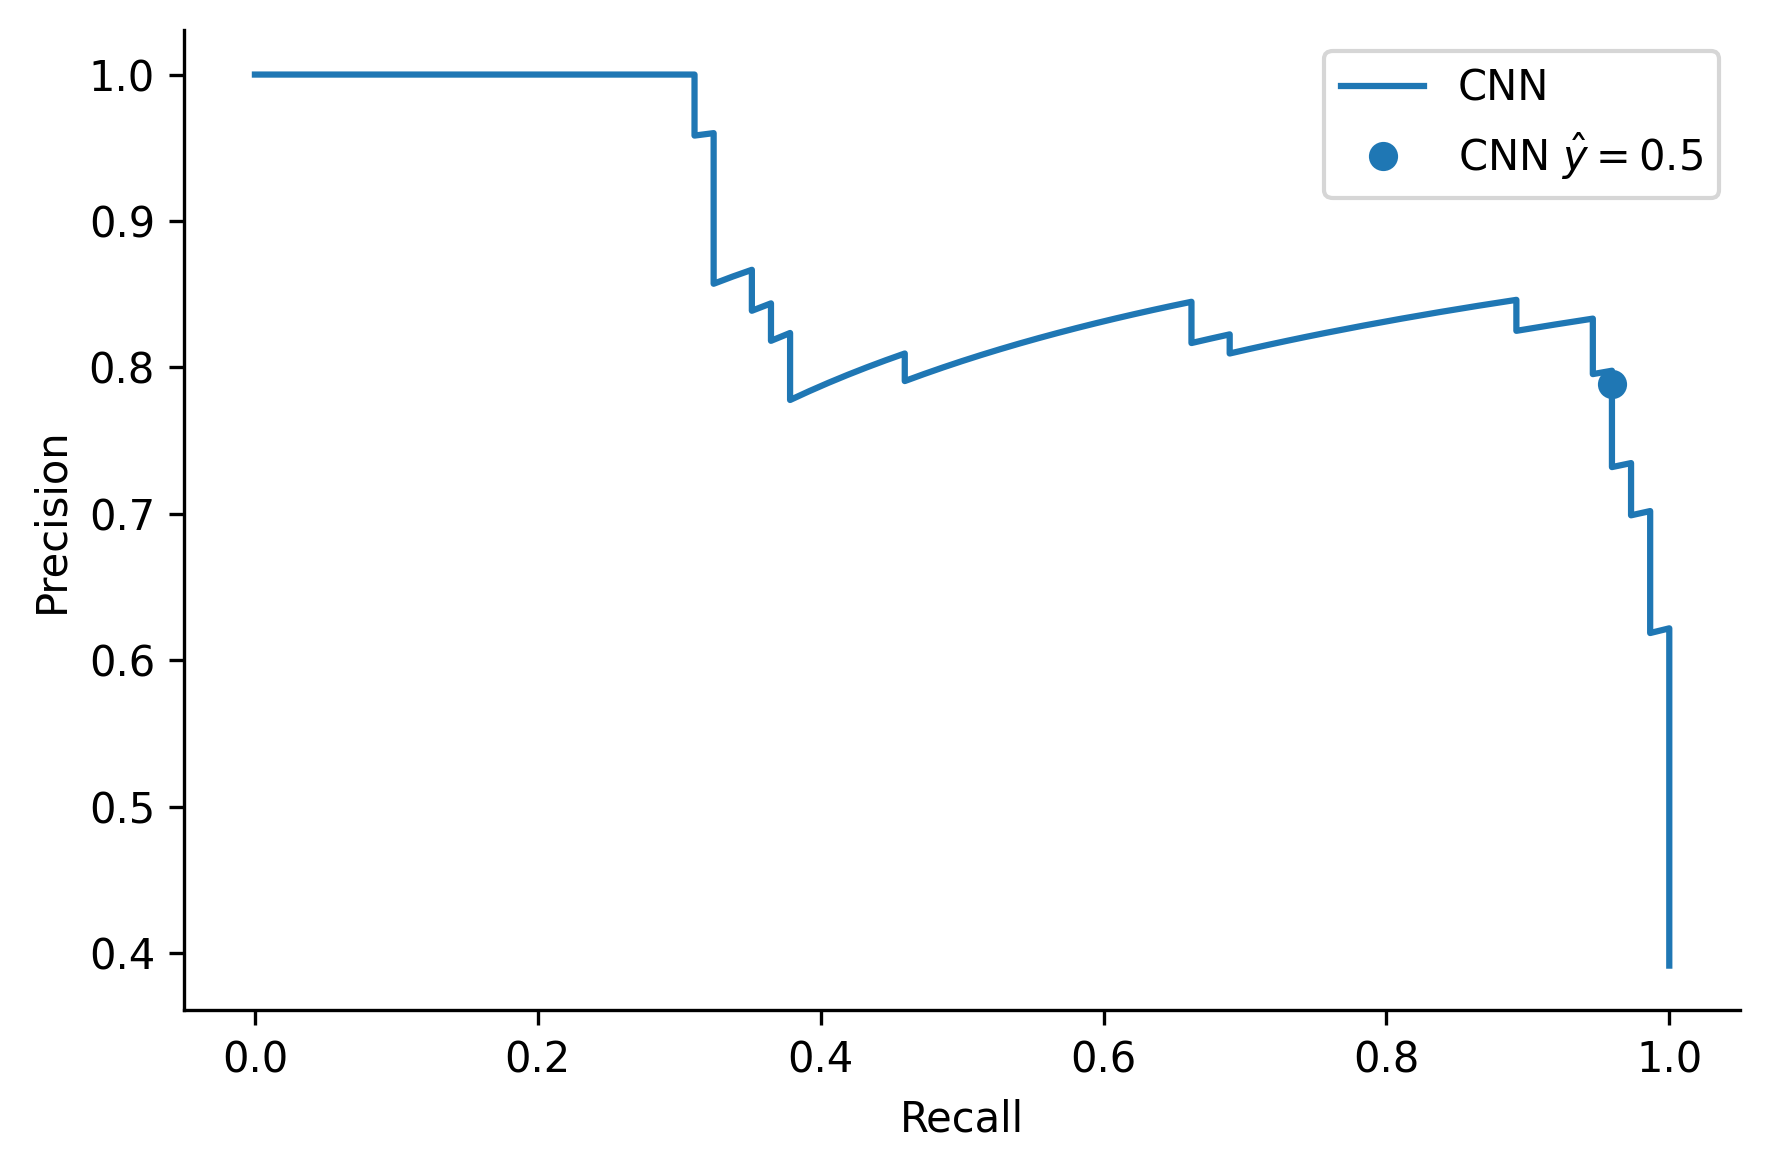

In [10]:
# A plot for the report of both curves together!

fig, ax = plt.subplots(figsize=(6, 4), dpi=300)
# plt.xlim((0, 1.1))
# plt.ylim((0, 1.1))

label_every = 20

# tmr_rp = prec_recall_curve_tmr[1::-1, :].T
final_rp = prec_recall_curve_final[1::-1, :].T

# ax.plot(prec_recall_curve_tmr[1], prec_recall_curve_tmr[0], label="Initial CNN")
ax.plot(prec_recall_curve_final[1], prec_recall_curve_final[0], label="CNN")

"""
for point in prec_recall_curve_tmr[:, ::30].T:
    print(point)
    p, r, dec = point[0], point[1], point[2]
    ax.annotate(f"{sigmoid(dec):.2f}", xy=(r+0.05, p+0.05), textcoords='offset points', )

for point in prec_recall_curve_final[:, ::30].T:
    print(point)
    p, r, dec = point[0], point[1], point[2]
    ax.annotate(f"{sigmoid(dec):.2f}", xy=(r+0.05, p+0.05), textcoords='offset points')
"""

# closest_point_to_0_tmr = np.argmin(np.abs(prec_recall_curve_tmr[2, :]))
# ax.plot(prec_recall_curve_tmr[1, closest_point_to_0_tmr], prec_recall_curve_tmr[0, closest_point_to_0_tmr], "o", color="#1f77b4", label=r"Initial CNN $\hat{y} = 0.5$")
# ax.annotate(f"Zero", xy=(prec_recall_curve_tmr[1, closest_point_to_0_tmr], prec_recall_curve_tmr[0, closest_point_to_0_tmr]), textcoords='offset points')
orange = "#ff7f0e"
closest_point_to_0_final = np.argmin(np.abs(prec_recall_curve_final[2, :]))
ax.plot(prec_recall_curve_final[1, closest_point_to_0_final], prec_recall_curve_final[0, closest_point_to_0_final], "o", color="#1f77b4", label=r"CNN $\hat{y} = 0.5$")
# ax.annotate(f"Zero", xy=(prec_recall_curve_final[1, closest_point_to_0_final], prec_recall_curve_final[0, closest_point_to_0_final]), textcoords='offset points')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend()

ax.set_xlabel("Recall")
ax.set_ylabel("Precision")

fig.tight_layout()

# plt.show()
fig.savefig("../ManuscriptFigs/CNN_NoiseDetect_precision_recall_only_final.png")

In [ ]:
prec_recall_curve_tmr[:, ::5].T

In [ ]:
a = np.array([[1,2,3], [10,20,30], [100,200,300]])
print(a[1::-1, :])

In [ ]:
# A plot for the report

fig, ax = plt.subplots(figsize=(6, 4), dpi=300)
ax.plot(r, p)
# plt.xlim((0, 1.1))
# plt.ylim((0, 1.1))

label_every = 20

label_rp = [(rec, prec) for rec, prec in zip(r[::label_every], p[::label_every])]
label_d = [dec for dec in d[::label_every]]

for rp, dec in zip(label_rp, label_d):
    ax.annotate(f"{dec:.2f}", xy=rp, textcoords='offset points')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel("Recall")
ax.set_ylabel("Precision")

plt.show()
# fig.savefig("FinalReportFigs/CNN_NoiseDetect_precision_recall.png")

In [ ]:
import Utilities.Plotting
import importlib
importlib.reload(Utilities.Plotting)
from Utilities.Plotting import *

In [ ]:
plot_dataset = val_dataset[(val_dataset["prediction"] > 0) & (val_dataset["class_index"] == 0)]

"""
from matplotlib.ticker import AutoMinorLocator

def plot_ecg(x, fs=500, title=None):
    sample_len = x.shape[0]
    time_axis = np.arange(sample_len)/fs

    y_step = 2

    cuts = [0, sample_len//3, (sample_len*2)//3, sample_len-1]

    fig, ax = plt.subplots(3, 1, figsize=(8, 6))
    for j in range(3):
        ax[j].plot(time_axis[cuts[j]:cuts[j+1]], x[cuts[j]:cuts[j+1]])
        ax[j].set_xlabel("Time")
        ax[j].set_xlim((time_axis[cuts[j]], time_axis[cuts[j+1]]))

        t_s = time_axis[cuts[j]]
        t_f = time_axis[cuts[j+1]]
        time_ticks = np.arange(t_s - t_s%0.2, t_f + (0.2 - t_f%0.2), 0.2)
        decimal_labels = ~np.isclose(time_ticks, np.round(time_ticks))
        time_labels = np.round(time_ticks).astype(int).astype(str)
        time_labels[decimal_labels] = ""

        ax[j].set_xticks(time_ticks, labels=time_labels)
        ax[j].set_yticks(np.arange(x.min()-y_step, x.max()+y_step, y_step))

        # ax[j].xaxis.set_major_formatter(plt.NullFormatter())
        # ax[j].yaxis.set_major_formatter(plt.NullFormatter())

        ax[j].xaxis.set_minor_locator(AutoMinorLocator(5))
        ax[j].yaxis.set_minor_locator(AutoMinorLocator(5))

        ax[j].set_ylim((x.min()-y_step, x.max()+y_step))
        ax[j].set_xlim((t_s, t_f))

        ax[j].grid(which='major', linestyle='-', linewidth='0.2', color='black')
        ax[j].grid(which='minor', linestyle='-', linewidth='0.2', color='lightgray')

    if title is not None:
        fig.suptitle(title)
    fig.tight_layout()
    # plt.savefig("test_ecg_plot.png", dpi=300)
    # plt.show()

c = DiagEnum.CannotExcludePathology
"""

for _, ecg in plot_dataset[plot_dataset["measDiag"].map(lambda x: x.value) == 3].sample(frac=1).iterrows():
    print(ecg[["ptDiag", "tag_orig_Poor_Quality", "poss_AF_tag", "measDiag", "prediction"]])
    plot_ecg(ecg["data"], 300, n_split=3, figsize=(12, 9), export_quality=False)
    plt.show()

In [ ]:
def sigmoid(x):
    return 1/ (1 + np.exp(-x))

In [ ]:
x = np.array([1.2999, 2.39132, 0.695852])
sigmoid(x)

In [ ]:
def plot_ecg_section_examples(xs, ranges, titles, fs=300):
    fig, ax = plt.subplots(len(xs), 1, figsize=(6, 4))

    for j, (x, r, t) in enumerate(zip(xs, ranges, titles)):
        sample_len = r[1] - r[0]
        time_axis = np.arange(sample_len)/fs

        ax[j].plot(time_axis, x[r[0]:r[1]])
        ax[j].set_xlabel("Time")
        ax[j].set_xlim((time_axis[0], time_axis[-1]))

        t_s = time_axis[0]
        t_f = time_axis[-1]
        time_ticks = np.arange(t_s - t_s%0.2, t_f + (0.2 - t_f%0.2), 0.2)
        decimal_labels = ~np.isclose(time_ticks, np.round(time_ticks))
        time_labels = np.round(time_ticks).astype(int).astype(str)
        time_labels[decimal_labels] = ""
        ax[j].set_xticks(time_ticks, time_labels)

        ax[j].set_title(t)

        ax[j].yaxis.set_major_formatter(plt.NullFormatter())

        ax[j].xaxis.set_minor_locator(AutoMinorLocator(5))
        ax[j].yaxis.set_minor_locator(AutoMinorLocator(5))

        ax[j].grid(which='major', linestyle='-', linewidth='0.5', color='black')
        ax[j].grid(which='minor', linestyle='-', linewidth='0.5', color='lightgray')

    fig.tight_layout()
    plt.show()
    # plt.savefig("TMRFigures/cnn_false_positive_examples.png")

ecg_ind_list = [1248, 12804]
ranges = [(0, 3010), (3000, 6010)]

xs = plot_dataset.loc[ecg_ind_list]["data"].tolist()

titles = plot_dataset.loc[ecg_ind_list].apply(lambda x: f"{x['measDiag'].name}, p(noisy) = {sigmoid(x['prediction']):.3f}", axis=1)   # ["measDiag"].map(lambda x: x.name).tolist()
print(len(titles))

plot_ecg_section_examples(xs, ranges, titles)

In [ ]:
# Lets compare probabilities of noise

low = -0.2
high = 0.0
noise_levels = [0.2, 0.35, 0.5, 0.65, 0.8]

val_dataset["noise_prob"] = val_dataset["prediction"].map(sigmoid)
plot_dataset = [val_dataset[(val_dataset["noise_prob"] > low) & (val_dataset["noise_prob"] < high)] for low, high in zip(noise_levels[:-1], noise_levels[1:])]

fig, ax = plt.subplots(len(noise_levels) -1, 3, figsize=(12, 7))

fs = 300

for j in range(len(noise_levels)-1):
    dataset = plot_dataset[j]
    k = 0
    for _, ecg in dataset.iterrows():

        print(ecg[["ptDiag", "tag_orig_Poor_Quality", "poss_AF_tag", "measDiag", "prediction"]])
        x = ecg["data"][3000:6000]

        sample_len = x.shape[0]
        time_axis = np.arange(sample_len)/fs

        ax[j][k].plot(time_axis, x)

        if j == len(noise_levels)-2:
            ax[j][k].set_xlabel("Time")
        ax[j][k].set_xlim((time_axis[0], time_axis[-1]))

        t_s = time_axis[0]
        t_f = time_axis[-1]
        time_ticks = np.arange(t_s - t_s%0.2, t_f + (0.2 - t_f%0.2), 0.2)
        decimal_labels = ~np.isclose(time_ticks, np.round(time_ticks))
        time_labels = np.round(time_ticks).astype(int).astype(str)
        time_labels[decimal_labels] = ""

        ax[j][k].set_xticks(time_ticks, time_labels)
        ax[j][k].set_yticklabels([])

        ax[j][k].xaxis.set_minor_locator(AutoMinorLocator(5))
        ax[j][k].yaxis.set_minor_locator(AutoMinorLocator(5))

        ax[j][k].grid(which='major', linestyle='-', linewidth='0.5', color='black')
        ax[j][k].grid(which='minor', linestyle='-', linewidth='0.5', color='lightgray')

        if k == 0:
            ax[j][k].set_ylabel(r"$[{:.2f}, {:.2f})$".format(noise_levels[j], noise_levels[j+1]))

        k += 1
        if k >= 3:
            break

fig.tight_layout()

plt.show()

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from mpl_toolkits.axes_grid1 import make_axes_locatable

conf_1 = np.array([[96, 19], [5, 69]])
conf_2 = np.array([[97, 18], [3, 71]])
conf_3 = np.array([[83, 32], [1, 73]])

fig, ax = plt.subplots(figsize=(4, 4))

ConfusionMatrixDisplay(conf_3, display_labels=["Sufficient Quality", "Poor Quality"]).plot(cmap="GnBu", ax=ax, colorbar=False)
fig.tight_layout()
plt.show()

### Perform cross validation

In [ ]:
test_pt_df["noHQrecsNotUndecided"]

In [ ]:
train_df["class_index"].value_counts()

In [ ]:
# Cross Validation dataset construction for SAFER data
# Split train and test data according to each patient
feas2_pt_data["noLQrecs"] = feas2_pt_data["noRecs"] - feas2_pt_data["noHQrecs"]

num_cv = 4
num_folds = 2 * num_cv  # twice to produce the val and test for each fold!
pt_folds = [[] for _ in range(num_folds)]

lq_counts = np.zeros(num_folds, dtype=int)
total_counts = np.zeros(num_folds, dtype=int)

total_total_count = 0
total_lq_count = 0

# Go around the folds and assign patients to each
for _, pt in feas2_pt_data.iterrows():
    total_total_count += pt["noHQrecsNotUndecided"] + pt["noLQrecs"]
    total_lq_count += pt["noLQrecs"]

    exp_total_counts = total_total_count * 1.0/num_folds
    exp_lq_counts = total_lq_count * 1.0/num_folds

    lq_rec_mat = np.diag(np.array([pt["noLQrecs"] for _ in range(num_folds)]))
    hq_rec_mat = np.diag(np.array([pt["noHQrecsNotUndecided"] for _ in range(num_folds)]))

    loss =  np.sum(np.abs(lq_counts[None, :] + lq_rec_mat - exp_lq_counts) + np.abs(total_counts[None, :] + hq_rec_mat - exp_total_counts), axis=-1)
    best_fold = np.argmin(loss)

    pt_folds[best_fold].append(pt)
    lq_counts[best_fold] += pt["noLQrecs"]
    total_counts[best_fold] += pt["noHQrecsNotUndecided"] + pt["noLQrecs"]


test_pt_folds = [pd.DataFrame(fold) for fold in pt_folds[:4]]
val_pt_folds = [pd.DataFrame(fold) for fold in pt_folds[4:]]
train_pt_folds = [feas2_pt_data[(~feas2_pt_data["ptID"].isin(test_fold["ptID"])) & (~feas2_pt_data["ptID"].isin(val_fold["ptID"]))] for test_fold, val_fold in zip(test_pt_folds, val_pt_folds)]

for f in test_pt_folds:
    print(f["noLQrecs"].sum(), f["noHQrecsNotUndecided"].sum())

for f in val_pt_folds:
    print(f["noLQrecs"].sum(), f["noHQrecsNotUndecided"].sum())

conf_mats = []

num_epochs = 30

for i, (train_pt_df, test_pt_df, val_pt_df) in enumerate(zip(train_pt_folds, test_pt_folds, val_pt_folds)):
    print(f"Fold {i}")
    train_df = feas2_ecg_data[feas2_ecg_data["ptID"].isin(train_pt_df["ptID"])]
    test_df = feas2_ecg_data[(feas2_ecg_data["ptID"].isin(test_pt_df["ptID"])) & (feas2_ecg_data["measDiag"] != DiagEnum.Undecided)]
    val_df = feas2_ecg_data[(feas2_ecg_data["ptID"].isin(val_pt_df["ptID"])) & (feas2_ecg_data["measDiag"] != DiagEnum.Undecided)]


    class_counts = torch.tensor(train_df["class_index"].value_counts().values.astype(np.float32))
    a = class_counts[0]/(class_counts[0] + class_counts[1])

    a_test_counts = torch.tensor(feas2_ecg_data[feas2_ecg_data["measDiag"] != DiagEnum.Undecided]["class_index"].value_counts().values.astype(np.float32))
    a_test = a_test_counts[0]/(a_test_counts[0] + a_test_counts[1])

    print(train_df["class_index"].value_counts())
    print(test_df["class_index"].value_counts())
    print(val_df["class_index"].value_counts())

    """

    torch_dataset_train = Dataset(train_df)
    torch_dataset_test = Dataset(test_df)
    torch_dataset_val = Dataset(val_df)

    train_dataloader = DataLoader(torch_dataset_train, batch_size=32, shuffle=True, pin_memory=True)
    test_dataloader = DataLoader(torch_dataset_test, batch_size=32, shuffle=True, pin_memory=True)
    val_dataloader = DataLoader(torch_dataset_val, batch_size=32, shuffle=True, pin_memory=True)


    break

    model = CNN(**hyperparameters).to(device)

    weight_modifier = 1
    loss_func = binary_focal_loss((1 - (1-a) * weight_modifier), 0)
    test_loss_func = binary_focal_loss(a_test, 0)

    optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)
    scheduler = StepLR(optimizer, 6, 1)

    num_batches = len(train_dataloader)
    num_test_batches = len(test_dataloader)

    model, losses = train(model, train_dataloader, test_dataloader, loss_func, test_loss_func, optimizer, scheduler)
    model = model.to(device)

    predictions, true_labels = get_predictions(model, val_dataloader, val_df)
    conf_mat = confusion_matrix(true_labels, predictions > 0)

    print(conf_mat)

    conf_mats.append(conf_mat)
    """

In [ ]:
f1_scores_normal = [F1_ind(c, 0) for c in conf_mats]
f1_scores_noisy = [F1_ind(c, 1) for c in conf_mats]

print(f"Mean F1 normal: {np.mean(f1_scores_normal)}")
print(f"Mean F1 noisy: {np.mean(f1_scores_noisy)}")
print(f"Individual F1 scores (noisy): {f1_scores_noisy}")

In [ ]:
for c in conf_mats:
    print(c)

### Test on the noise stress test database

In [ ]:
# load stress test noise data
import wfdb
import os
import scipy.signal

noise_stress_test_db = "mit-bih-noise-stress-test-database"
stress_test_files = ["118e24", "119e24", "118e06", "118e00", "118e_6", "119e06", "119e00", "119e_6"]

labels = []
noise_level = []
samples = []

# Additionally band pass filter
def filter_ecg(x, fs):
    b, a = scipy.signal.butter(3, [0.66, 50], 'band', fs=fs)
    x = scipy.signal.filtfilt(b, a, x, padlen=150)
    x = (x - min(x)) / (max(x) - min(x))
    return x

for file in stress_test_files:
    try:
        print(f"Reading file: {file}")
        data = wfdb.io.rdrecord(os.path.join(noise_stress_test_db, file))
        all_data_v1 = data.p_signal[:,1]
        # Resample to 300Hz
        all_data_v1 = scipy.signal.resample(all_data_v1, int(all_data_v1.shape[0] * 300/data.fs))
        # all_data_v1 = filter_ecg(all_data_v1, data.fs)
        # all_data_v1 = adaptive_gain_norm(all_data_v1, 501)

        sec_len = 300 * 30  # 30s segments
        i = 1
        while i * sec_len < all_data_v1.shape[0]:
            s = all_data_v1[(i-1)*sec_len:i*sec_len]
            samples.append(s)
            noise_level.append(file.split("e")[-1])

            if i * 30 < 300:
                labels.append("N")
            elif (i * 30 - 300) % 240 > 120 or (i * 30 - 300) % 240 == 0:
                labels.append("N")
            elif (i * 30 - 300) % 240 <= 120:
                labels.append("~")

            i += 1

    except ValueError:
        print("error, scipping file")
        continue


nst_df = pd.DataFrame({"data": samples, "class": labels, "noise_level": noise_level})
pk_path = "mit-bih-noise-stress-test-database/database.pk"
nst_df.to_pickle(pk_path)

In [ ]:
nst_df["class_index"] = (nst_df["class"] == "~").astype(int)

class NSTDataset(torch.utils.data.Dataset):
  'Characterizes a dataset for PyTorch'
  def __init__(self, dataset):
        'Initialization'
        self.dataset = dataset

  def __len__(self):
        'Denotes the total number of samples'
        return len(self.dataset.index)

  def __getitem__(self, index):
        'Generates one sample of data'
        # Select sample
        row = self.dataset.iloc[index]

        X = row["data"]  # The only dataset and nst dataset difference is in this line!
        y = row["class_index"]

        return X, y

# Normalise the data
nst_df["data"] = (nst_df["data"] - nst_df["data"].map(lambda x: x.mean()))/nst_df["data"].map(lambda x: x.std())

torch_dataset_nst = NSTDataset(nst_df)
nst_dataloader = DataLoader(torch_dataset_nst, batch_size=32, shuffle=True, pin_memory=True)

In [ ]:
model.eval()

true_labels = []
predictions = []

false_positives = []
true_negatives = []

with torch.no_grad():
    for i, (signals, labels) in enumerate(nst_dataloader):
        signals = torch.unsqueeze(signals.to(device), 1).float()
        # fft = torch.abs(torch.fft.fft(signals))
        # signals = torch.cat([signals, fft], dim=1)
        labels = labels.detach().numpy()
        true_labels.append(labels)

        optimizer.zero_grad()
        output = model(signals).detach().to("cpu").numpy()

        prediction = np.argmax(output, axis=-1)
        false_positive = np.logical_and(labels == 0, prediction == 1)
        false_positives.append(signals[false_positive, 0, :].cpu().detach().numpy())

        true_negative = np.logical_and(labels == 1, prediction == 0)
        true_negatives.append(signals[true_negative, 0, :].cpu().detach().numpy())

        predictions.append(np.argmax(output, axis=-1))

predictions = np.concatenate(predictions)
true_labels = np.concatenate(true_labels)
false_positives = np.concatenate(false_positives, axis=0)
true_negatives = np.concatenate(true_negatives, axis=0)

In [ ]:
ConfusionMatrixDisplay.from_predictions(true_labels, predictions, display_labels=["sufficint quality", "insufficient quality"], cmap="inferno")

conf_mat = confusion_matrix(true_labels, predictions)

def F1_ind(conf_mat, ind):
    return (2 * conf_mat[ind, ind])/(np.sum(conf_mat[ind]) + np.sum(conf_mat[:, ind]))

print(f"Normal F1: {F1_ind(conf_mat, 0)}")
print(f"Other F1: {F1_ind(conf_mat, 1)}")
# print(f"AF F1: {F1_ind(conf_mat, 2)}")
# print(f"Noisy F1: {F1_ind(conf_mat, 3)}")

print(f"Average F1 score: {sum([F1_ind(conf_mat, i) for i in range(2)])/2}")

In [ ]:
index = 40
print(false_positives.shape)

fig = go.Figure(go.Scatter(y=false_positives[index]))
fig.show()

In [ ]:
index = 15
print(true_negatives.shape)

fig = go.Figure(go.Scatter(y=true_negatives[index]))
fig.show()

### Hyperparameter optimisation

In [ ]:
class ModelWrapper:

    def __init__(self, **kwargs):
        self.params = kwargs
        self.set_params(**kwargs)

    def fit(self, X=None, y=None):
        self.model, _ = train(self.model, train_dataloader, test_dataloader, self.loss_func, self.loss_func, self.optimizer, self.scheduler)
        self.model = self.model.to(device)

    def score(self, X=None, y=None):
        model.eval()

        true_labels = []
        predictions = []

        with torch.no_grad():
            for i, (signals, labels, ind) in enumerate(test_dataloader):
                signals = torch.unsqueeze(signals.to(device), 1).float()
                labels = labels.detach().numpy()
                true_labels.append(labels)

                output = self.model(signals).detach().to("cpu").numpy()

                prediction = output # np.argmax(output, axis=-1)
                predictions.append(prediction)

        predictions = np.concatenate(predictions)
        true_labels = np.concatenate(true_labels)

        conf_mat = confusion_matrix(true_labels, predictions > 0)
        return - F1_ind(conf_mat, 1)

    def get_params(self, deep=True):
        return self.params

    def set_params(self, **kwargs):
        print("setting parameters")
        self.model = CNN(**hyperparameters).to(device)
        self.loss_func = binary_focal_loss(a, kwargs["gamma"])
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=kwargs["lr"])
        self.scheduler = StepLR(optimizer, kwargs["sched_step"], kwargs["sched_gamma"])
        return self


In [ ]:
hyperparameters

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

"""
priors = {"lr": Real(1e-6, 1e-2, prior="uniform", name="lr"),
          "gamma": Real(0, 5, prior="uniform", name="gamma"),
          "sched_gamma": Real(0.1, 1, prior="uniform", name="sched_gamma"),
          "sched_step": Integer(5, 25, prior="uniform", name="sched_step"),

          "k1": Integer(17, 17, "uniform", name="k1"),
          "k2": Integer(11, 11, "uniform", name="k2"),
          "k3": Integer( 5, 5, "uniform", name="k3"),
          "k4": Integer( 3, 3, "uniform", name="k4"),
          "k5": Integer( 3, 3, "uniform", name="k5"),
          "k6": Integer( 3, 3, "uniform", name="k6"),

          "c1": Integer(128, 128, "uniform", name="c1"),
          "c2": Integer( 256, 256, "uniform", name="c2"),
          "c3": Integer( 256, 256, "uniform", name="c3"),
          "c4": Integer( 128, 128, "uniform", name="c4"),
          "c5": Integer( 64, 64, "uniform", name="c5"),
          "c6": Integer( 32, 32, "uniform", name="c6"),

          "lstm_n_hidden": Integer(32, 32, "uniform", name="lstm_n_hidden"),

          "dense1": Integer(256, 256, "uniform", name="dense1"),
          "dense2": Integer(16, 16, "uniform", name="dense2")}
"""

priors = {"lr": Real(1e-6, 1e-2, prior="uniform", name="lr"),
          "gamma": Real(0, 5, prior="uniform", name="gamma"),
          "sched_gamma": Real(0.1, 1, prior="uniform", name="sched_gamma"),
          "sched_step": Integer(5, 25, prior="uniform", name="sched_step")}

opt = BayesSearchCV(
    ModelWrapper(**hyperparameters),
    priors,
    n_iter=5,
    cv=2
)

pointless = np.array([1,2,3,4,5])

# opt.fit(pointless)

In [ ]:
print(opt.best_score_)
print(opt.best_params_)

In [ ]:
hyperparameters = dict(opt.best_params_)
model = opt.best_estimator_.model

In [ ]:
from skopt import gp_minimize
from skopt.utils import use_named_args

dimensions = list(priors.values())

@use_named_args(dimensions=dimensions)
def train_and_score(**kwargs):
    print(f"Testing with {kwargs}")
    m = ModelWrapper(**kwargs)
    m.fit()
    score = m.score()
    print(type(score))
    print(f"Model score: {score}")
    return float(score)

res = gp_minimize(train_and_score, dimensions, acq_func="EI", n_calls=20, n_random_starts=5, noise=0.1**2)

In [ ]:
for name, val in zip(priors.keys(), res.x):
    print(f"{name}: {val}")

In [ ]:
res.models

In [ ]:
@use_named_args(dimensions=dimensions)
def train_and_get_final_model(**kwargs):
    print(f"Testing with {kwargs}")
    m = ModelWrapper(**kwargs)
    m.fit()
    return m.model

model = train_and_get_final_model(res.x)